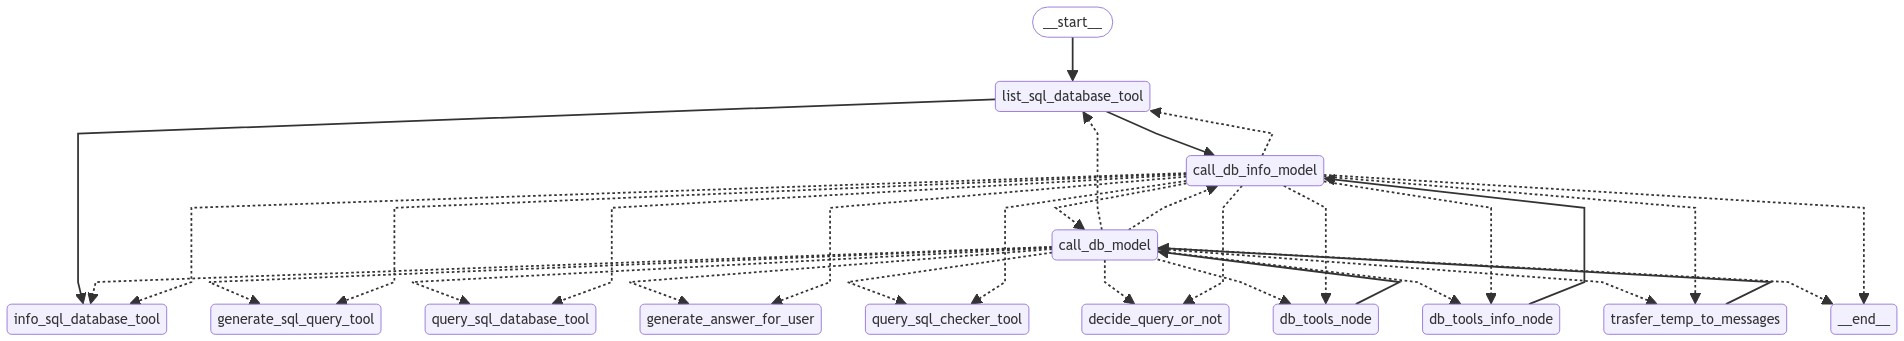

In [2]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from Graph import Graph

display(
    Image(
        Graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

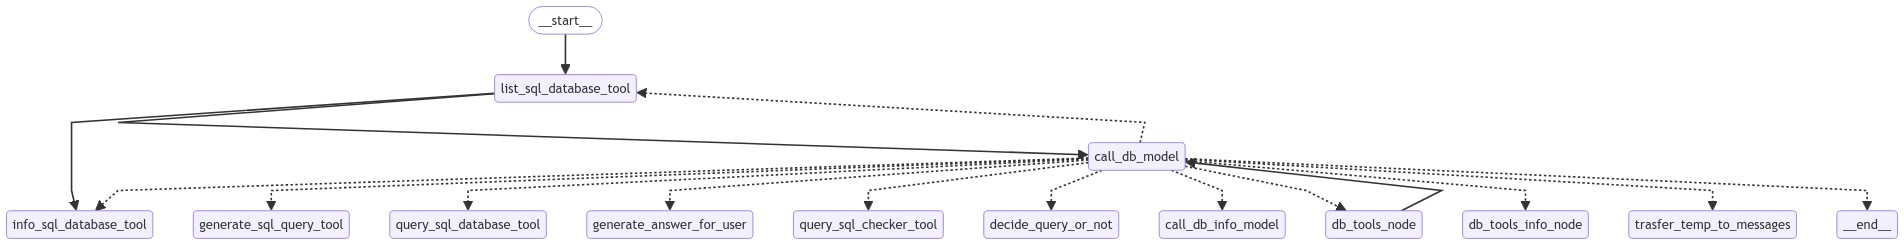

In [2]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from Graph import Graph

display(
    Image(
        Graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [3]:
from MetadataToolkitNodes import list_sql_database_tool, info_sql_database_tool, generate_sql_query_tool, query_sql_database_tool
from State import State
state = State

In [4]:
state.question = "How many tables have tags applied? Also name the tables."

In [5]:
state = list_sql_database_tool(state)

In [6]:
state = info_sql_database_tool(state)

In [7]:
state.relevant_tables_sample_data

"\nCREATE TABLE dashboard_entity (\n\tid VARCHAR(36) GENERATED ALWAYS AS ((json_unquote(json_extract(`json`,_utf8mb4'$.id')))) STORED NOT NULL, \n\tjson JSON NOT NULL, \n\t`updatedAt` BIGINT UNSIGNED GENERATED ALWAYS AS ((json_unquote(json_extract(`json`,_utf8mb4'$.updatedAt')))) VIRTUAL NOT NULL, \n\t`updatedBy` VARCHAR(256) GENERATED ALWAYS AS ((json_unquote(json_extract(`json`,_utf8mb4'$.updatedBy')))) VIRTUAL NOT NULL, \n\tdeleted TINYINT(1) GENERATED ALWAYS AS ((json_extract(`json`,_utf8mb4'$.deleted'))) VIRTUAL, \n\t`fqnHash` VARCHAR(768) CHARACTER SET ascii COLLATE ascii_bin, \n\tname VARCHAR(256) GENERATED ALWAYS AS ((json_unquote(json_extract(`json`,_utf8mb4'$.name')))) VIRTUAL NOT NULL, \n\tPRIMARY KEY (id)\n)COLLATE utf8mb4_0900_ai_ci DEFAULT CHARSET=utf8mb4 ENGINE=InnoDB\n\n\nCREATE TABLE database_entity (\n\tid VARCHAR(36) GENERATED ALWAYS AS ((json_unquote(json_extract(`json`,_utf8mb4'$.id')))) STORED NOT NULL, \n\tjson JSON NOT NULL, \n\t`updatedAt` BIGINT UNSIGNED GENER

In [8]:
state = generate_sql_query_tool(state)

In [9]:
state.sql_query

'  SELECT COUNT(DISTINCT te.id) AS table_count, GROUP_CONCAT(DISTINCT te.name) AS table_names FROM table_entity te JOIN tag_usage tu ON te.fqnHash = tu.targetFQNHash   '

In [10]:
state = query_sql_database_tool(state)

In [12]:
state.query_result

"[(3, 'family_ncbi,motif_family_stats,motif_ss_image')]"

In [17]:
# import json
# f = open("dbinfo.json", "r")
# dbinfo = json.loads(f.read())